<a href="https://colab.research.google.com/github/Mar-bh/Adventure-Game/blob/main/Actividad4.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Actividad 4.1 - Porceso de la vida real como distribuciones de probabilidad**

Mariana Bustos Hernández - *a01641324*

**1. Selección del fenómeno:**
Cantidad de lluvia total mensual en Zapopan, Jalisco.

**2. Atributo medible:**
Milímetros(mm) de precipitación total al mes.

**3. Recolección de datos:**
Datos fuente:
Datos de la estación meteorológica de Zapopan, Jalisco (código de estación: 14169) proporcionados por la CONAGUA.

Enlace directo: [Normales Climatológicas - Estación 14169 (Jalisco)](https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Mensuales/jal/mes14169.txt)

Periodo: Datos mensuales históricos (normales climatológicas). Los datos proporcionados contienen registros mensuales de lluvia desde 1941 a 2020 en archivo "DatosLluviaZapopan.scv"

In [64]:
import pandas as pd
import numpy as np

# Cargar datos
df = pd.read_csv('DatosLluviaZapopan.csv')

# Eliminar columnas no necesarias (Total, Average, Months)
df = df.drop(['Total', 'Average', 'Months'], axis=1)

# Convertir a formato "long" (una fila por mes-año)
df_melted = df.melt(id_vars='Year', var_name='Month', value_name='Precipitacion')

# Eliminar filas con NaN
df_clean = df_melted.dropna()

print(df_clean['Precipitacion'].describe())

count     503.000000
mean      117.972505
std       208.013580
min         0.000000
25%         5.800000
50%        39.200000
75%       135.500000
max      1277.000000
Name: Precipitacion, dtype: float64


**4. Histograma de frecuencias**

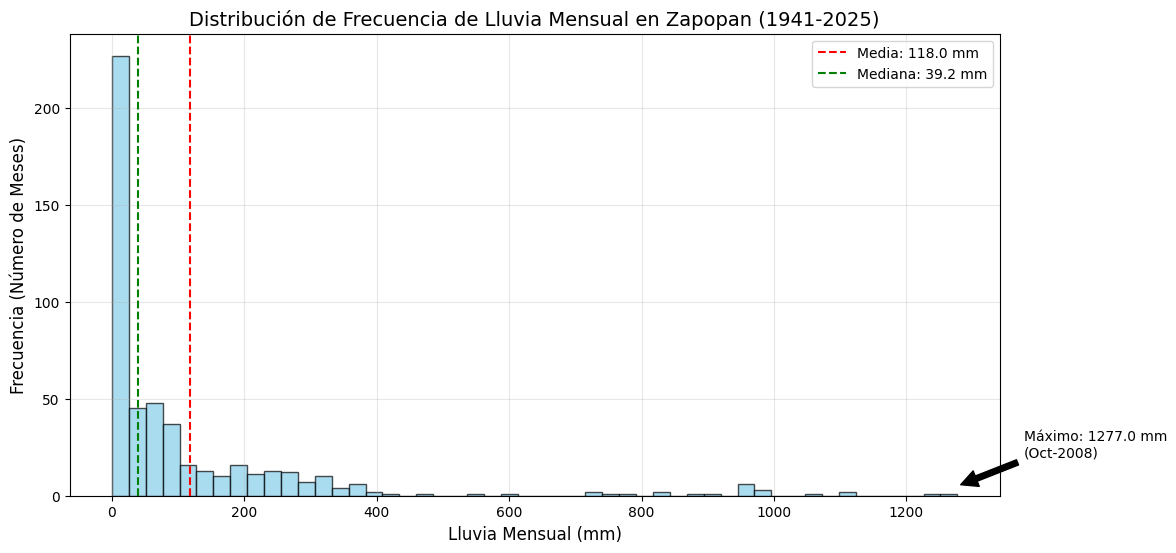

In [65]:
import matplotlib.pyplot as plt

# Configurar el histograma
plt.figure(figsize=(12, 6))
n_bins = 50  # Número de barras para mayor detalle
plt.hist(df_clean['Precipitacion'],  bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir líneas de referencia
mean_rainfall = df_clean['Precipitacion'].mean()
median_rainfall = df_clean['Precipitacion'].median()
plt.axvline(mean_rainfall, color='red', linestyle='--', label=f'Media: {mean_rainfall:.1f} mm')
plt.axvline(median_rainfall, color='green', linestyle='--', label=f'Mediana: {median_rainfall:.1f} mm')

# Personalización
plt.title('Distribución de Frecuencia de Lluvia Mensual en Zapopan (1941-2025)', fontsize=14)
plt.xlabel('Lluvia Mensual (mm)', fontsize=12)
plt.ylabel('Frecuencia (Número de Meses)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Mostrar valores atípicos
max_rain = df_clean['Precipitacion'].max()
plt.annotate(f'Máximo: {max_rain} mm\n(Oct-2008)',
             xy=(max_rain, 5), xytext=(max_rain + 100, 20),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

plt.show()

**5. Ajuste de distribución con Fitter**



In [72]:
# First uninstall existing versions

from fitter import Fitter

fit = Fitter(df_clean['Precipitacion'].values, distributions=['gamma', 'lognorm', 'weibull_min', 'expon'])
fit.fit()
fit.summary()
best_dist = fit.get_best(method='sumsquare_error')
print(best_dist)


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: fitter 1.7.1
Uninstalling fitter-1.7.1:
  Successfully uninstalled fitter-1.7.1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 87.0 MB/s eta 0:00:00
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25604 sha256=0710b66d2cd5c329ea731dc061a5744e5b4d575585dc49d235ba049512b74e9a
  Stored in directory: /root/.cache/pip/wheels/e9/f7/6b/ffbc053435394c6f35773fb3c2fe39be193e4ed7250b17c634
Successfully built fitter
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, b

ModuleNotFoundError: No module named 'numpy.char'

**6. Parámetros de la distribución seleccionada**

**7. Reflexión**

¿Cuáles son los parámetros de la distribución?

¿Cómo podrías utilizar el modelo creado?

¿Puedes usar distribuciones de probabilidad para identificar similitudes entre varios procesos?